In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
import random

In [27]:
df = pd.read_csv("PC_Export_2016_2017.csv")
df.head()

,pc_code,pc_description,unit,country_code,country_name,quantity,value
0,99,Other Commodities,Na,599,Unspecified,NaN,270.889542
1,99,Other Commodities,Na,1213,Kenya,NaN,17.159452
2,99,Other Commodities,Na,1395,Tanzania Rep,NaN,8.896539
3,99,Other Commodities,Na,1417,Uganda,NaN,5.181412
4,99,Other Commodities,Na,2035,Benin,NaN,2.476015


In [28]:
df.describe()

,country_code,quantity,value
count,20844.000000,1.006500e+04,20844.000000
mean,9053.099645,3.903794e+06,13.267463
std,4495.312603,7.484555e+07,136.903421
min,2.000000,0.000000e+00,0.000000
25%,4365.000000,1.360000e+02,0.024924
50%,10179.000000,5.175000e+03,0.299185
75%,13101.000000,1.690850e+05,2.788682
max,16409.000000,5.710303e+09,9599.857922


In [29]:
#untuk mengetahui informasi dari setiap variabel 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20844 entries, 0 to 20843
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pc_code         20844 non-null  object 
 1   pc_description  20844 non-null  object 
 2   unit            20844 non-null  object 
 3   country_code    20844 non-null  int64  
 4   country_name    20844 non-null  object 
 5   quantity        10065 non-null  float64
 6   value           20844 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


Memeriksa nilai yang null

In [30]:
total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/df.isnull().count())\
.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, \
                        keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = \
missing_data['Missing Percent'].apply(lambda x: x * 100)

missing_data.loc[missing_data['Missing Percent'] > 10][:10]

,Total,Missing Percent
quantity,10779,51.712723


In [31]:
print(df.shape)

(20844, 7)


Analisis Variabel Secara Individual

In [32]:
numerical_vars = ['country_code','quantity','value']
categorical_vars = ['pc_code','pc_description','unit','country_name']

In [33]:
df = df[numerical_vars+categorical_vars]

In [34]:
print(df.shape)

(20844, 7)


Memahami Variabel Numerical

In [35]:
df['country_code'].describe()

count    20844.000000
mean      9053.099645
std       4495.312603
min          2.000000
25%       4365.000000
50%      10179.000000
75%      13101.000000
max      16409.000000
Name: country_code, dtype: float64

In [36]:
df['quantity'].describe()

count    1.006500e+04
mean     3.903794e+06
std      7.484555e+07
min      0.000000e+00
25%      1.360000e+02
50%      5.175000e+03
75%      1.690850e+05
max      5.710303e+09
Name: quantity, dtype: float64

In [37]:
df['value'].describe()

count    20844.000000
mean        13.267463
std        136.903421
min          0.000000
25%          0.024924
50%          0.299185
75%          2.788682
max       9599.857922
Name: value, dtype: float64

In [38]:
df[numerical_vars].describe()

,country_code,quantity,value
count,20844.000000,1.006500e+04,20844.000000
mean,9053.099645,3.903794e+06,13.267463
std,4495.312603,7.484555e+07,136.903421
min,2.000000,0.000000e+00,0.000000
25%,4365.000000,1.360000e+02,0.024924
50%,10179.000000,5.175000e+03,0.299185
75%,13101.000000,1.690850e+05,2.788682
max,16409.000000,5.710303e+09,9599.857922


Memahami Variabel Categorical

In [39]:
df['pc_code'].describe()

count     20844
unique      168
top          H8
freq        209
Name: pc_code, dtype: object

In [40]:
df['pc_description'].describe()

count                              20844
unique                               168
top       Drug Formulations, Biologicals
freq                                 209
Name: pc_description, dtype: object

In [41]:
df['unit'].describe()

count     20844
unique        6
top          Na
freq      10779
Name: unit, dtype: object

In [42]:
df['country_name'].describe()

count     20844
unique      233
top       U S A
freq        161
Name: country_name, dtype: object

In [43]:
df[categorical_vars].describe()

,pc_code,pc_description,unit,country_name
count,20844,20844,20844,20844
unique,168,168,6,233
top,H8,"Drug Formulations, Biologicals",Na,U S A
freq,209,209,10779,161


Data Cleaning

Metode yang digunakan untuk menangani nilai yang null atau NaN yaitu dengan menggunakan Fill Forward yaitu digunakan untuk mengisi maju, dimana nilai terakhir yang diketahui yang akan digunakan untuk menggati nilai yang null

In [44]:
df = pd.read_csv("PC_Export_2016_2017.csv")

In [45]:
df.head()

,pc_code,pc_description,unit,country_code,country_name,quantity,value
0,99,Other Commodities,Na,599,Unspecified,NaN,270.889542
1,99,Other Commodities,Na,1213,Kenya,NaN,17.159452
2,99,Other Commodities,Na,1395,Tanzania Rep,NaN,8.896539
3,99,Other Commodities,Na,1417,Uganda,NaN,5.181412
4,99,Other Commodities,Na,2035,Benin,NaN,2.476015


In [46]:
dc = df.fillna(df.mean())

In [47]:
dc.head()

,pc_code,pc_description,unit,country_code,country_name,quantity,value
0,99,Other Commodities,Na,599,Unspecified,3.903794e+06,270.889542
1,99,Other Commodities,Na,1213,Kenya,3.903794e+06,17.159452
2,99,Other Commodities,Na,1395,Tanzania Rep,3.903794e+06,8.896539
3,99,Other Commodities,Na,1417,Uganda,3.903794e+06,5.181412
4,99,Other Commodities,Na,2035,Benin,3.903794e+06,2.476015


In [48]:
dc['quantity'] = dc['quantity'].astype(int)
dc['value'] = dc['value'].astype(int)
display(dc)

,pc_code,pc_description,unit,country_code,country_name,quantity,value
0,99,Other Commodities,Na,599,Unspecified,3903794,270
1,99,Other Commodities,Na,1213,Kenya,3903794,17
2,99,Other Commodities,Na,1395,Tanzania Rep,3903794,8
3,99,Other Commodities,Na,1417,Uganda,3903794,5
4,99,Other Commodities,Na,2035,Benin,3903794,2
...,...,...,...,...,...,...,...
20839,S6,Petroleum Products,Ton,15430,Uzbekistan,2,0
20840,S6,Petroleum Products,Ton,16095,Cyprus,36194,20
20841,S6,Petroleum Products,Ton,16151,Gibraltar,2920254,1285
20842,S6,Petroleum Products,Ton,16251,Malta,68267,24


In [49]:
print(dc.shape)

(20844, 7)


Check Nilai Null setelah dilakukan data cleaning

In [50]:
dc.isnull().sum()

pc_code           0
pc_description    0
unit              0
country_code      0
country_name      0
quantity          0
value             0
dtype: int64

In [51]:
total = dc.isnull().sum().sort_values(ascending=False)

percent = (dc.isnull().sum()/dc.isnull().count())\
.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, \
                        keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = \
missing_data['Missing Percent'].apply(lambda x: x * 100)

missing_data.loc[missing_data['Missing Percent'] > 10][:10]

,Total,Missing Percent


Mengubah nilai attibut yang bernilai negatif menjadi nol.

In [52]:
dc['quantity'] = dc['quantity'].apply(lambda x : x if x > 0 else 0)

In [53]:
(dc == 0).astype(int).sum(axis=0)

pc_code               0
pc_description        0
unit                  0
country_code          0
country_name          0
quantity            517
value             13277
dtype: int64

In [54]:
dc['quantity'].describe()

count    2.084400e+04
mean     3.449267e+06
std      2.154227e+07
min      0.000000e+00
25%      6.826500e+03
50%      3.903794e+06
75%      3.903794e+06
max      1.581681e+09
Name: quantity, dtype: float64

In [55]:
dc['quantity'] = dc['quantity'].apply(lambda x: random.uniform(1, 5) if x == 0 else x)

In [56]:
dc['value'] = dc['value'].apply(lambda x: random.uniform(1, 5) if x == 0 else x)

In [57]:
(dc == 0).astype(int).sum(axis=0)

pc_code           0
pc_description    0
unit              0
country_code      0
country_name      0
quantity          0
value             0
dtype: int64

Memilih dua variabel dari data - "Quantity" dan "Value", dan visualisasikan poin datanya.

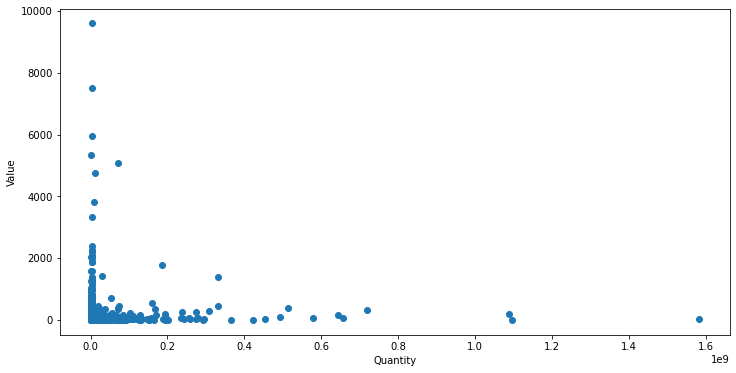

In [58]:
X = dc[["quantity", "value"]]

#Visualise data points
plt.figure(figsize=(12,6))
plt.scatter(X["quantity"], X["value"])
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

Memilih jumlah cluster (k) dan memilih centroid acak untuk setiap cluster. Kami memilih 2 cluster dan kemudian memilih observasi acak dari data sebagai centroid.

In [62]:
dc['quantity'] = dc['quantity'].apply(lambda x: random.uniform(1, 5) if x > 5 else x)

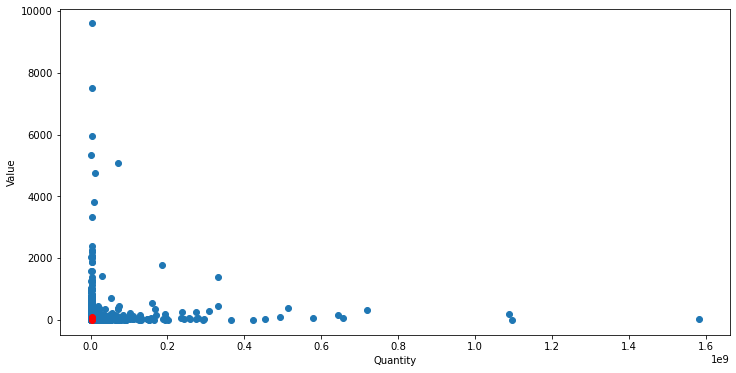

In [63]:
#number of clusters
K=2

#Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(12,6))
plt.scatter(X["quantity"], X["value"])
plt.scatter(Centroids["quantity"], Centroids["value"], c='red')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

Nilai-nilai ini mungkin berbeda setiap kali kami menjalankan ini. Di sini, kami menghentikan pelatihan ketika sentroid tidak berubah setelah dua iterasi. Kami awalnya mendefinisikan diff sebagai 1 dan di dalam while loop, kami menghitung perbedaan ini sebagai perbedaan antara sentroid pada iterasi sebelumnya dan iterasi saat ini. Jika selisihnya adalah 0, kami menghentikan pelatihan.

In [64]:
diff = 1
j=0
while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1=(row_c["quantity"]-  row_d["quantity"])**2
            d2=(row_c["value"]- row_d["value"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
        
    C=[]
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]= C
    Centroids_new = X.groupby(["Cluster"]).mean()[["value","quantity"]]
    
    if j==0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['quantity'] - Centroids_new['quantity']).sum() + (Centroids_new['quantity'] - Centroids_new['quantity']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["quantity","value"]]

<ipython-input-64-1b41103d0a25>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-64-1b41103d0a25>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]= C


0.0


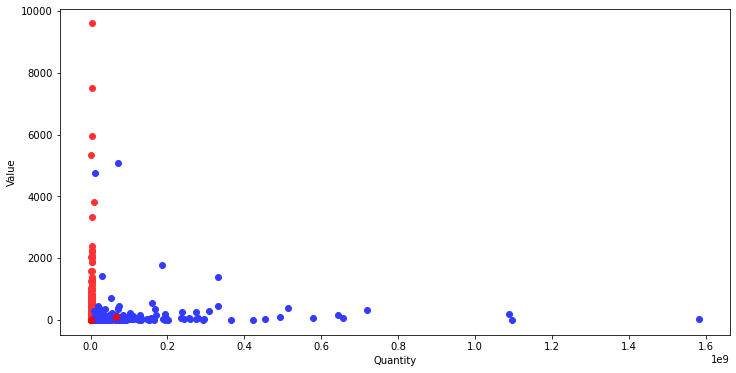

In [65]:
color=['#ff3333', '#333bff']
plt.figure(figsize=(12,6))

for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["quantity"], data["value"], c=color[k])
plt.scatter(Centroids["quantity"], Centroids["value"], c='red')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

In [66]:
# reading the data and looking at the first five rows of the data
dc.head()

,pc_code,pc_description,unit,country_code,country_name,quantity,value
0,99,Other Commodities,Na,599,Unspecified,3.604302,270.0
1,99,Other Commodities,Na,1213,Kenya,2.216091,17.0
2,99,Other Commodities,Na,1395,Tanzania Rep,4.530124,8.0
3,99,Other Commodities,Na,1417,Uganda,1.916113,5.0
4,99,Other Commodities,Na,2035,Benin,1.553441,2.0


In [67]:
sltd_data = data[["quantity", "value"]]

# statistics of the data
sltd_data.describe()

,quantity,value
count,3.850000e+02,385.000000
mean,6.748692e+07,93.218368
std,1.442222e+08,382.377511
min,9.649117e+06,1.000000
25%,1.385196e+07,10.000000
50%,2.187693e+07,26.000000
75%,5.220394e+07,69.000000
max,1.581681e+09,5071.000000


In [68]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

#statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,3.850000e+02,3.850000e+02
mean,-9.501779e-17,-9.227828e-18
std,1.001301e+00,1.001301e+00
min,-4.015545e-01,-2.414848e-01
25%,-3.723751e-01,-2.179172e-01
50%,-3.166596e-01,-1.760193e-01
75%,-1.061062e-01,-6.341869e-02
max,1.051270e+01,1.303492e+01


(-1.0, 10.0)

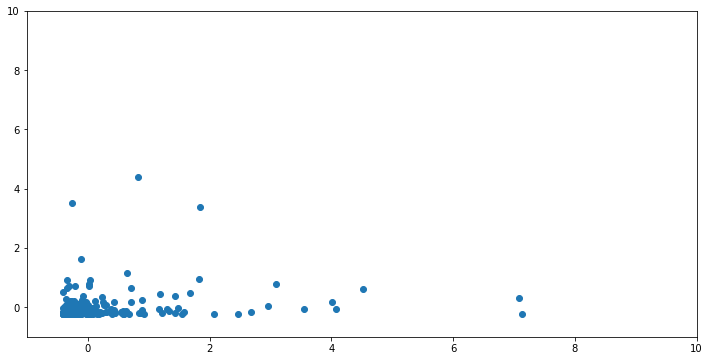

In [69]:
# create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,0], data_scaled[:,1])
plt.xlim(-1,10)
plt.ylim(-1,10)

In [141]:
# defining the kmeans function with initialization as random
kmeans = KMeans(n_clusters=2, init='random')

#fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(init='random', n_clusters=2)

In [142]:
#save new clusters for chart
y_km = kmeans.fit_predict(data_scaled)

(-2.0, 15.0)

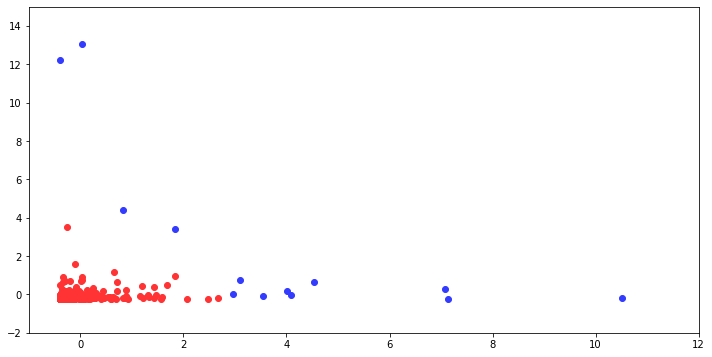

In [144]:
#create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km ==0,0], data_scaled[y_km == 0,1], c='#ff3333')
plt.scatter(data_scaled[y_km ==1,0], data_scaled[y_km == 1,1], c='#333bff')

plt.xlim(-1,12)
plt.ylim(-2,15)

In [145]:
# inertia on the fitted data
kmeans.inertia_

482.98117918508757

C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmea

Text(0, 0.5, 'Inertia')

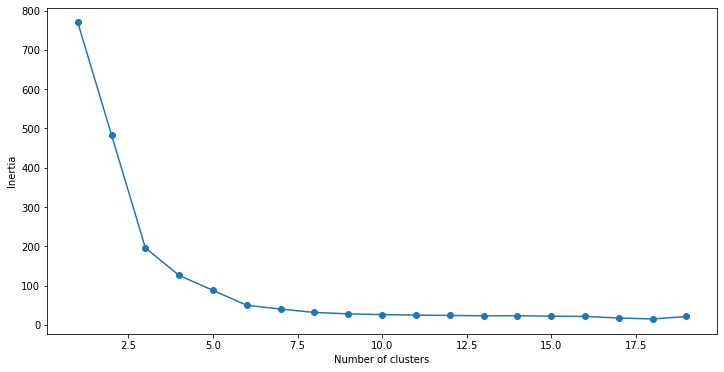

In [146]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs=-1, n_clusters = cluster, init='random') 
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [147]:
# k means using 3 clusters and random initialization
kmeans = KMeans(n_jobs=-1, n_clusters = 3, init='random') 
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [148]:
frame= pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    372
0     11
1      2
Name: cluster, dtype: int64

In [149]:
# inertia on the fitted data
kmeans.inertia_

196.00116101275637

In [150]:
# save new clusters for cahrt
y_km = kmeans.fit_predict(data_scaled)

C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


(-1.0, 15.0)

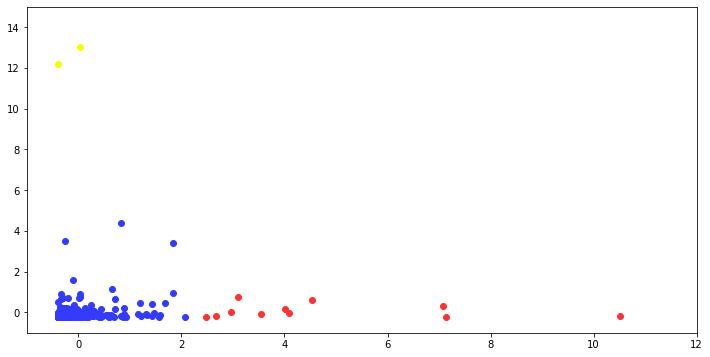

In [157]:
# create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km ==0,0], data_scaled[y_km == 0,1], c='#f5ff00')
plt.scatter(data_scaled[y_km ==1,0], data_scaled[y_km == 1,1], c='#ff3333')
plt.scatter(data_scaled[y_km ==2,0], data_scaled[y_km == 2,1], c='#333bff')
plt.xlim(-1,12)
plt.ylim(-1,15)

C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmea

Text(0, 0.5, 'Inertia')

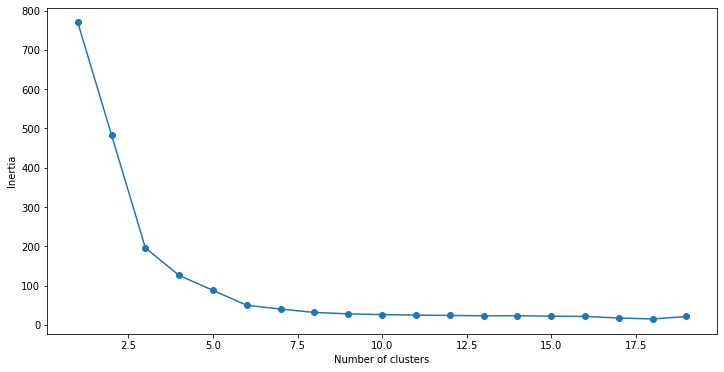

In [146]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs=-1, n_clusters = cluster, init='random') 
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Karna pada Grafik Momen Inersia ada grafik garis di atas (seperti sudut), tanda siku pada lengan adalah nilai optimal k(jumlah cluster). Berdasarkan grafik garis siku di atas, jumlah cluster optimal adalah 6.

In [158]:
# k means using 6 clusters and random initialization
kmeans = KMeans(n_jobs=-1, n_clusters = 6, init='random') 
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [159]:
frame= pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    325
0     43
3      9
4      3
2      3
5      2
Name: cluster, dtype: int64

In [160]:
# inertia on the fitted data
kmeans.inertia_

49.837272093656715

In [161]:
# save new clusters for cahrt
y_km = kmeans.fit_predict(data_scaled)

C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


(-1.0, 15.0)

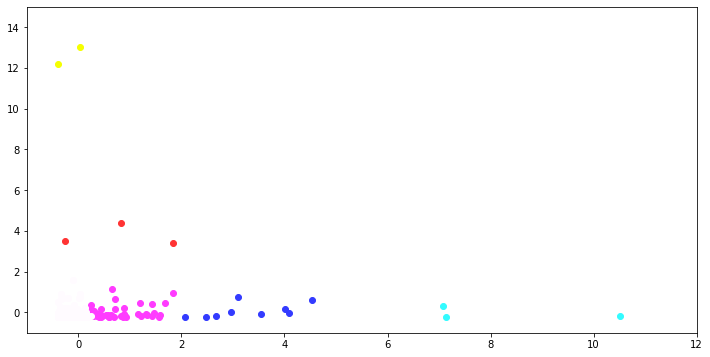

In [162]:
# create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km ==0,0], data_scaled[y_km == 0,1], c='#f5ff00')
plt.scatter(data_scaled[y_km ==1,0], data_scaled[y_km == 1,1], c='#ff3333')
plt.scatter(data_scaled[y_km ==2,0], data_scaled[y_km == 2,1], c='#333bff')
plt.scatter(data_scaled[y_km ==3,0], data_scaled[y_km == 3,1], c='#ff3bff')
plt.scatter(data_scaled[y_km ==4,0], data_scaled[y_km == 4,1], c='#fffbff')
plt.scatter(data_scaled[y_km ==5,0], data_scaled[y_km == 5,1], c='#33fbff')
plt.xlim(-1,12)
plt.ylim(-1,15)